<a href="https://colab.research.google.com/github/Faiyazbhai/lab/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [7]:
covid_df = pd.read_csv('/content/country_wise_latest.csv')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
covid_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [14]:
df = covid_df.copy()

In [16]:
df = pd.concat([covid_df], axis=0)
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [17]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,North Macedonia,10213,466,5564,4183,127,6,137,4.56,54.48,8.38,9249,964,10.42,Europe
1,Cuba,2532,87,2351,94,37,0,2,3.44,92.85,3.70,2446,86,3.52,Americas
2,Barbados,110,7,94,9,0,0,0,6.36,85.45,7.45,106,4,3.77,Americas
3,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa
4,Bosnia and Herzegovina,10498,294,4930,5274,731,14,375,2.80,46.96,5.96,8479,2019,23.81,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Kenya,17975,285,7833,9857,372,5,90,1.59,43.58,3.64,13771,4204,30.53,Africa
183,Netherlands,53413,6160,189,47064,419,1,0,11.53,0.35,3259.26,52132,1281,2.46,Europe
184,Haiti,7340,158,4365,2817,25,1,0,2.15,59.47,3.62,7053,287,4.07,Americas
185,Gambia,326,8,66,252,49,2,6,2.45,20.25,12.12,112,214,191.07,Africa


/tmp/ipython-input-1999003576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='WHO Region', palette='viridis')


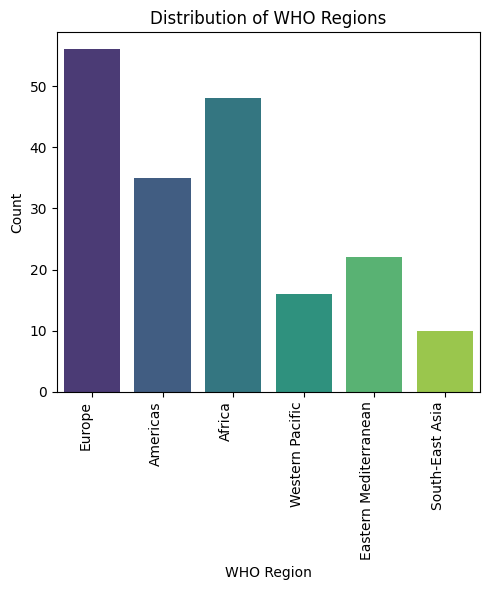

In [19]:
plt.figure(figsize=(5, 6))
sns.countplot(data=df, x='WHO Region', palette='viridis')
plt.title('Distribution of WHO Regions')
plt.xlabel('WHO Region')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(5, 6))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [22]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# download NLTK data if not already done
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, use_stemming=True):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation & numbers
    text = re.sub(f"[{string.punctuation}0-9]", " ", text)

    # 3. Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # 4. Tokenize
    tokens = text.split()

    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Apply stemming OR lemmatization
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [25]:
df["clean_text"] = df["WHO Region"].apply(lambda x: preprocess_text(x, use_stemming=False))

In [26]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,clean_text
0,North Macedonia,10213,466,5564,4183,127,6,137,4.56,54.48,8.38,9249,964,10.42,Europe,europe
1,Cuba,2532,87,2351,94,37,0,2,3.44,92.85,3.70,2446,86,3.52,Americas,america
2,Barbados,110,7,94,9,0,0,0,6.36,85.45,7.45,106,4,3.77,Americas,america
3,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa,africa
4,Bosnia and Herzegovina,10498,294,4930,5274,731,14,375,2.80,46.96,5.96,8479,2019,23.81,Europe,europe


In [28]:
X = df["clean_text"]
y = df["WHO Region"]

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train) #training
y_pred_lr = lr.predict(X_test) #testing

#evaluation matrics
print(f'Accuracy score (Logistic Regression): {accuracy_score(y_test, y_pred_lr)}')
print(f'precision score (Logistic Regression): {precision_score(y_test,y_pred_lr, average="weighted")}')
print(f'recall score (Logistic Regression): {recall_score(y_test, y_pred_lr, average="weighted")}')
print(f'f1 score (Logistic Regression): {f1_score(y_test, y_pred_lr, average="weighted")}')
# roc_auc
# print(f'roc_auc score (Logistic Regression): {roc_auc_score(y_test, y_pred_lr, average="weighted")}')

Accuracy score (Logistic Regression): 1.0
precision score (Logistic Regression): 1.0
recall score (Logistic Regression): 1.0
f1 score (Logistic Regression): 1.0


In [34]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#evaluation matrics
print(f'Accuracy score (SVM): {accuracy_score(y_test, y_pred_svm)}')
print(f'precision score (SVM): {precision_score(y_test, y_pred_svm, average="weighted")}')
print(f'recall score (SVM): {recall_score(y_test, y_pred_svm, average="weighted")}')
print(f'f1 score (SVM): {f1_score(y_test, y_pred_svm, average="weighted")}')
# roc_auc
# print(f'roc_auc score (SVM): {roc_auc_score(y_test, y_pred_svm)}')

Accuracy score (SVM): 1.0
precision score (SVM): 1.0
recall score (SVM): 1.0
f1 score (SVM): 1.0


In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(f'precision score (Decision Tree): {precision_score(y_test, y_pred_dt, average="weighted")}')
print(f'recall score (Decision Tree): {recall_score(y_test, y_pred_dt, average="weighted")}')
print(f'f1 score (Decision Tree): {f1_score(y_test, y_pred_dt, average="weighted")}')
# roc_auc
# print(f'roc_auc score (Decision Tree): {roc_auc_score(y_test, y_pred_dt)}')

Decision Tree Accuracy: 1.0
precision score (Decision Tree): 1.0
recall score (Decision Tree): 1.0
f1 score (Decision Tree): 1.0


In [38]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(f'precision score (Random Forest): {precision_score(y_test, y_pred_rf, average="weighted")}')
print(f'recall score (Random Forest): {recall_score(y_test, y_pred_rf, average="weighted")}')
print(f'f1 score (Random Forest): {f1_score(y_test, y_pred_rf, average="weighted")}')
# roc_auc
# print(f'roc_auc score (Random Forest): {roc_auc_score(y_test, y_pred_rf)}')

Random Forest Accuracy: 1.0
precision score (Random Forest): 1.0
recall score (Random Forest): 1.0
f1 score (Random Forest): 1.0


In [42]:
# confusion matrix func
def con_matrix(model_name, y_val, y_pred):
  cm = confusion_matrix(y_val, y_pred)

  plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
  })

  # create figure
  fig, ax = plt.subplots(figsize=(8, 6)) # Increased figure size for better readability
  # Define color map
  cmap = sns.color_palette('crest', as_cmap=True)

  # Get unique labels from y_val (true labels)
  unique_labels = sorted(y_val.unique())

  sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 12}, linewidths=0.5, linecolor='white',
            xticklabels=unique_labels, yticklabels=unique_labels) # Use unique_labels for ticks

  # Title for the confusion matrix
  title = f"Confusion Matrix - {model_name}"
  # Axis and Label ticks
  ax.set_title(title)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  # ax.xaxis.set_ticklabels(['0', '1']) # Removed hardcoded binary labels
  # ax.yaxis.set_ticklabels(['0', '1']) # Removed hardcoded binary labels

  # Gridline inside the confusion Matrix (optional, may not look good with many classes)
  # ax.hlines([1], *ax.get_xlim(), color='white', linewidth=4)
  # ax.vlines([1], *ax.get_ylim(), color='white', linewidth=4)

  plt.show()

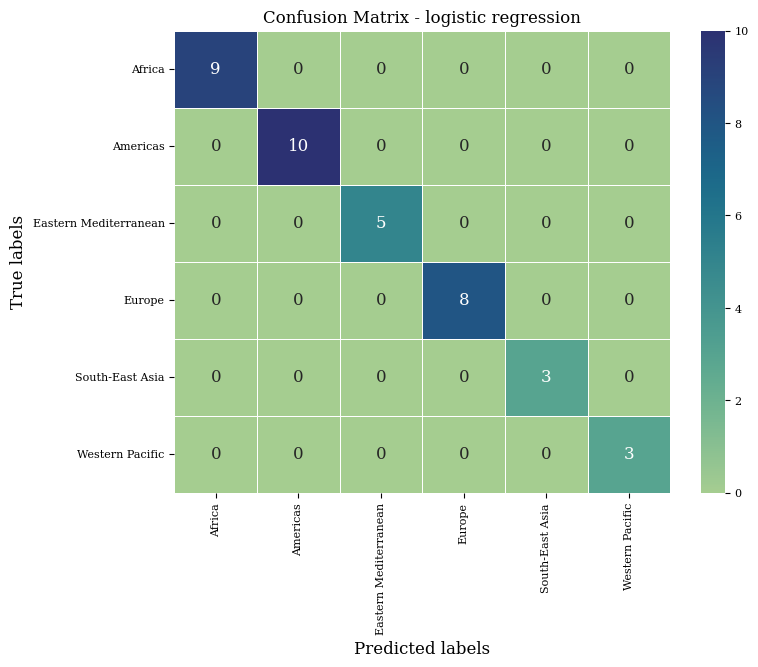

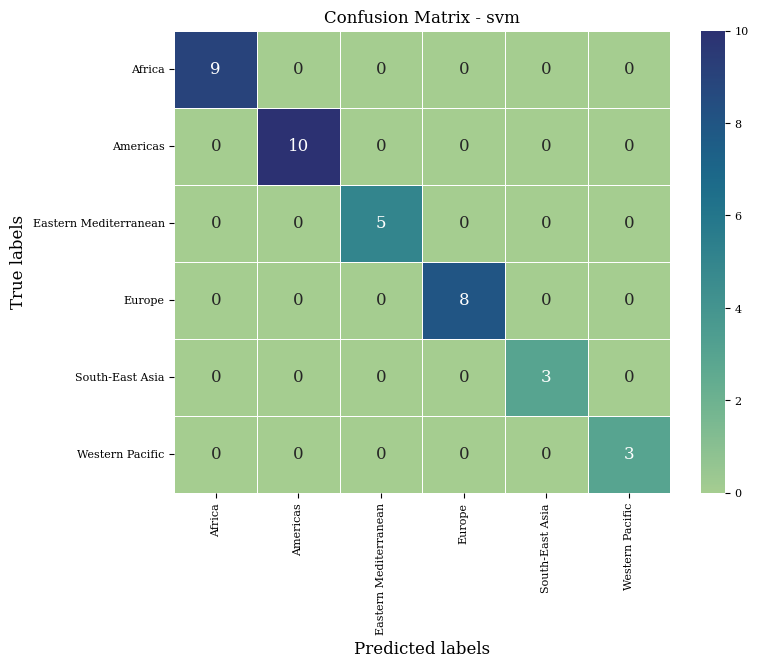

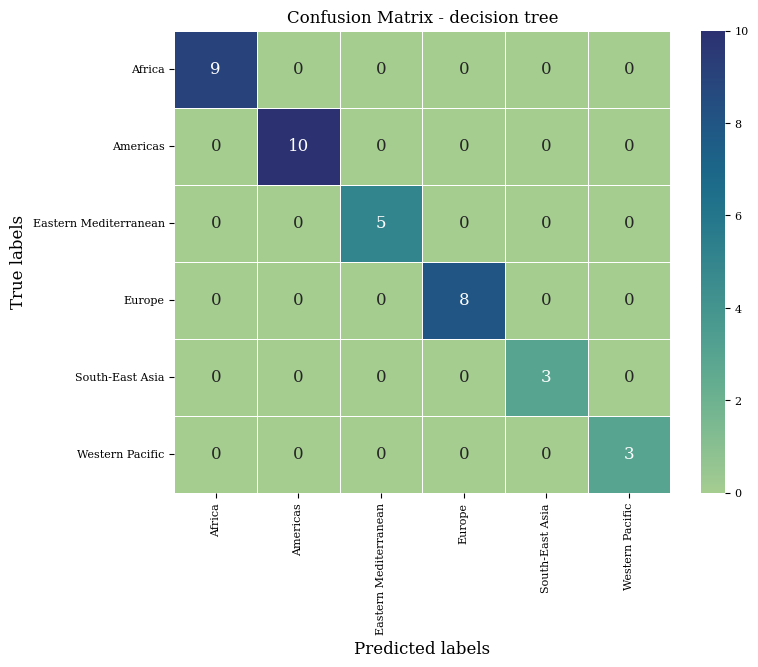

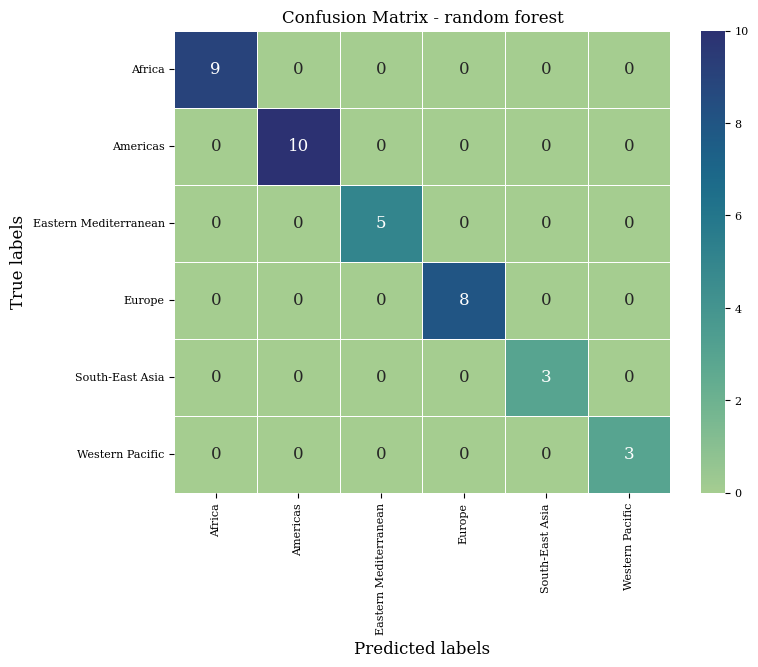

In [43]:
models = {
    'logistic regression': y_pred_lr,
    'svm': y_pred_svm,
    'decision tree': y_pred_dt,
    'random forest': y_pred_rf
}

for model_name, y_pred in models.items():
  con_matrix(model_name, y_test, y_pred)


In [46]:
# ROC curve for the models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 4))

models = {
    'logistic regression': lr,
    'svm': svm,
    'decision tree': dt,
    'random forest': rf
}
for model_name, model in models.items():

    if model_name == 'svm':
        y_proba = model.decision_function(X_test)
    else:
        y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    #plotting roc curves
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# graph details
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fake news detection using Different ML models (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: multiclass format is not supported

<Figure size 1000x400 with 0 Axes>

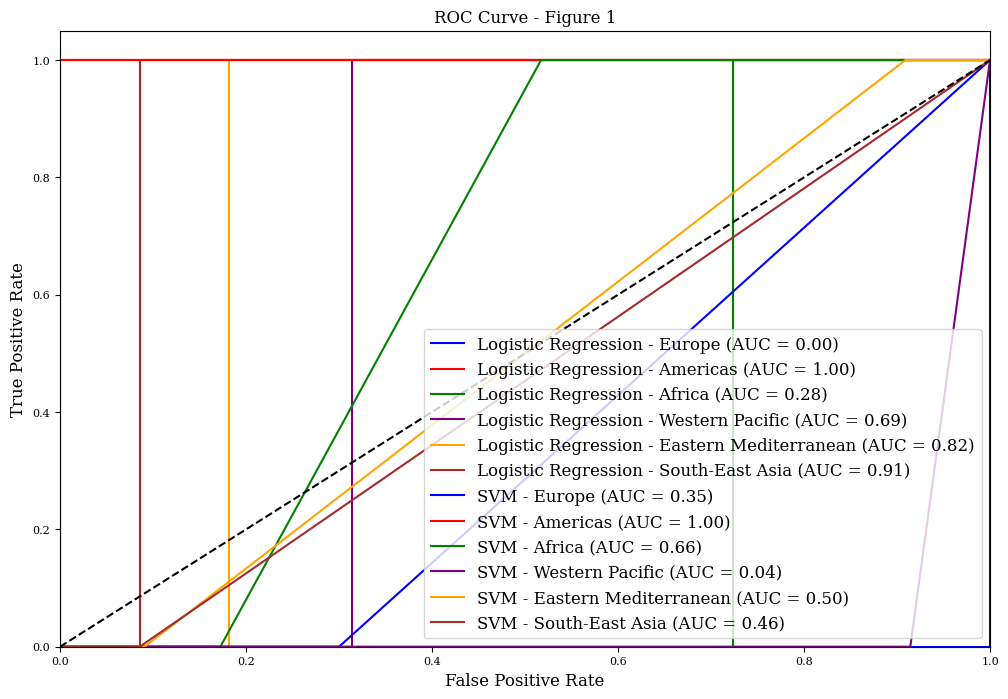

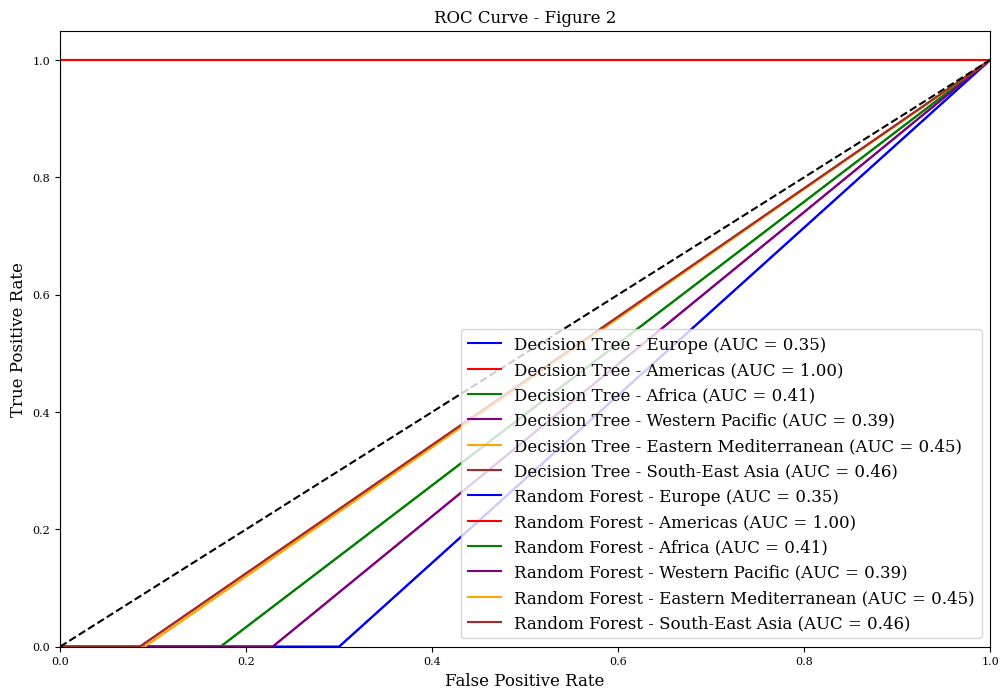

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test, classes=df['WHO Region'].unique())
n_classes = y_test_bin.shape[1]

models = {
    'Logistic Regression': lr,
    'SVM': svm,
    'Decision Tree': dt,
    'Random Forest': rf
}

colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']  # Colors for classes

# Split models into two groups
model_groups = [
    {'Logistic Regression': lr, 'SVM': svm},
    {'Decision Tree': dt, 'Random Forest': rf}
]

for fig_idx, model_group in enumerate(model_groups, start=1):
    plt.figure(figsize=(12, 8))
    for model_name, model in model_group.items():
        try:
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_test)
            elif hasattr(model, "decision_function"):
                y_score = model.decision_function(X_test)
            else:
                print(f"Model {model_name} does not have predict_proba or decision_function.")
                continue

            # Compute ROC curve and AUC for each class
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

            # Plot ROC curves
            for i in range(n_classes):
                plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)],
                         label=f'{model_name} - {df["WHO Region"].unique()[i]} (AUC = {roc_auc[i]:.2f})')
        except Exception as e:
            print(f"Could not plot ROC for {model_name}: {e}")

    # Plot random guess line
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Figure {fig_idx}')
    plt.legend(loc="lower right")
    plt.show()
